# NLP News Fake Project

In [93]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import CountVectorizer
nltk.__version__
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

In [94]:
#nltk.download()

In [95]:
import en_core_web_sm

nlp = en_core_web_sm.load()


#### 3- RE Regular Expersion

In [96]:
import re
import pandas as pd
import numpy as np

# EDA

In [97]:
df = pd.read_csv("new_news.csv")
df.head()

,text,label,class
0,aniel greenfiel shillman journal fellourladdom...,FAKE,0
1,googl pinterest igg linkein reit stumbleupon p...,FAKE,0
2,u secretari state john f kerri sai monay stop ...,REAL,1
3,kaye king kayeek novemb 9 2016 lesson tonight ...,FAKE,0
4,primari ay neurladd frontrunn hillari clinton ...,REAL,1


In [98]:
# Import the necessary modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
df.dropna(inplace= True)

# Print the head of df
# print(df.head())

# put x input
X = df.text
print(X.head())

# Create a series to store the labels: y
y = df["class"]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size = 0.33, random_state = 53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english")
print(count_vectorizer)

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)


# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

print(count_vectorizer.get_feature_names()[:10])
# Print the first 10 features of the count_vectorizer
# print(count_vectorizer.get_feature_names())

0    aniel greenfiel shillman journal fellourladdom...
1    googl pinterest igg linkein reit stumbleupon p...
2    u secretari state john f kerri sai monay stop ...
3    kaye king kayeek novemb 9 2016 lesson tonight ...
4    primari ay neurladd frontrunn hillari clinton ...
Name: text, dtype: object
CountVectorizer(stop_words='english')
['00', '000', '0000', '000000031', '00001400', '00006', '00017b2908ff9fa45188243f49aaeeb2hrcofficecom', '0004', '0005', '0006']


In [99]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train, y_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10]) 

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])


['00', '000', '0000', '000000031', '00001400', '00006', '00017b2908ff9fa45188243f49aaeeb2hrcofficecom', '0004', '0005', '0006']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [100]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# # Check whether the DataFrames are equal
# print(count_df.equals(tfidf_df))


   00  000  0000  000000031  00001400  00006  \
0   0    0     0          0         0      0   
1   0    0     0          0         0      0   
2   0    0     0          0         0      0   
3   0    0     0          0         0      0   
4   0    0     0          0         0      0   

   00017b2908ff9fa45188243f49aaeeb2hrcofficecom  0004  0005  0006  ...  \
0                                             0     0     0     0  ...   
1                                             0     0     0     0  ...   
2                                             0     0     0     0  ...   
3                                             0     0     0     0  ...   
4                                             0     0     0     0  ...   

   zurich  zurita  zurladd  zurladdnmenschlich  zuroff  zuylenwoo  zvai  \
0       0       0        0                   0       0          0     0   
1       0       0        0                   0       0          0     0   
2       0       0        0               

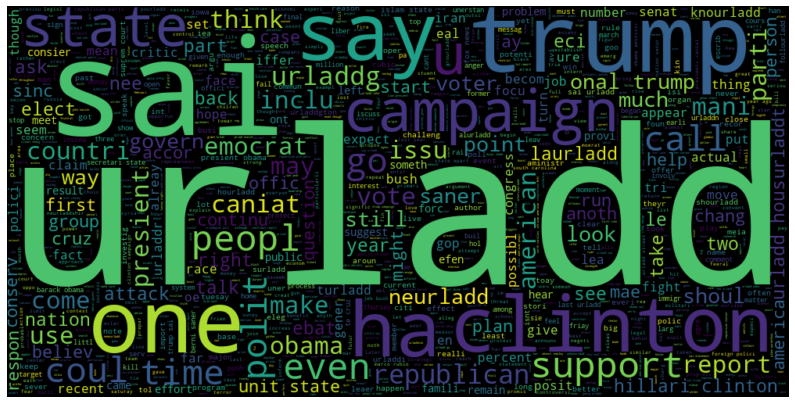

In [101]:

words=" ".join(df[df['class'] == 1].text)
plt.figure(figsize=(14 , 11))
wordcloud=WordCloud(max_words=5000, width=1000,height=500,stopwords=STOPWORDS,max_font_size=400).generate(words)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


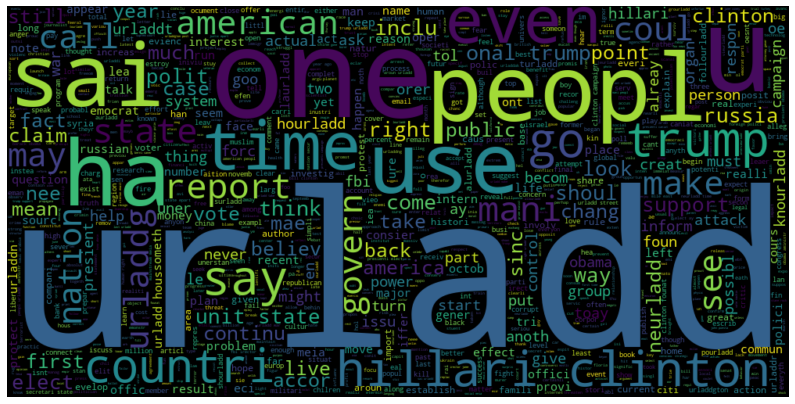

In [102]:
wordss=" ".join(df[df['class'] == 0].text)
plt.figure(figsize=(14 , 11))
wordcloud=WordCloud(max_words=5000, width=1000,height=500,stopwords=STOPWORDS,max_font_size=400).generate(wordss)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [105]:
# Import the necessary modules
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils.vis_utils import plot_model
from sklearn.metrics import plot_confusion_matrix

def plot(cnf_matrix, model):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix '+str(model), y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

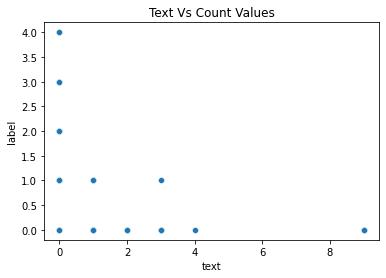

Accuracy:  90.5 %
[[924 110]
 [ 80 886]]


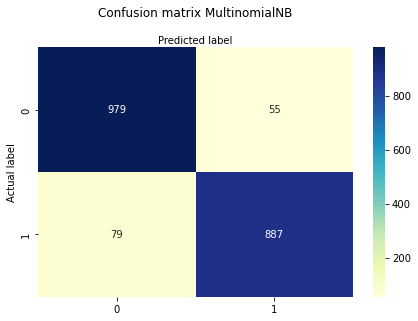

In [106]:
from sklearn.naive_bayes import MultinomialNB

sns.scatterplot(x='text', y='label', data=count_df,).set(title='Text Vs Count Values')
plt.show()
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB(alpha= 0.009)

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print('Accuracy: ',  score*100,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

# plot confusion matrix
plot(cnf_matrix,'MultinomialNB')



In [107]:
# Instantiate the classifier: nb_classifier
nb_classifier = MultinomialNB(alpha= 0.01)
# Fit to the training data
nb_classifier.fit(tfidf_train, y_train)
# Predict the labels: pred
pred = nb_classifier.predict(tfidf_test)
# Compute accuracy: score
print('Accuracy: ',  metrics.accuracy_score(y_test, pred)*100,"%")

Accuracy:  91.85 %


In [108]:
from sklearn.linear_model import  LogisticRegression
from sklearn import svm
from sklearn import metrics

Accuracy:  91.85 %


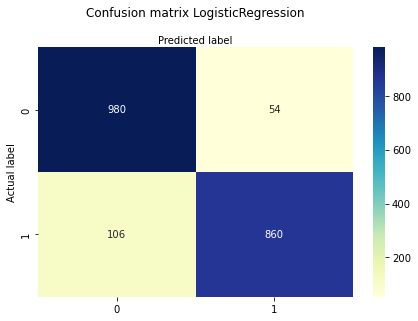

In [109]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(tfidf_train, y_train)

# Predict the labels: pred 
y_pred=logreg.predict(tfidf_test)

# Compute accuracy: score# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# plot confusion matrix
plot(cnf_matrix,'LogisticRegression')

# Compute accuracy: score
score = metrics.accuracy_score(y_test, pred)
print('Accuracy: ', score*100,"%")


Accuracy:  91.85 %


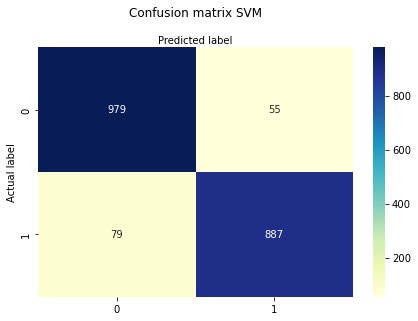

In [110]:
##svm Classifier
# instantiate the model (using the default parameters)
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# fit the model with data
clf.fit(tfidf_train, y_train)

# Predict the labels: pred 
y_pred=clf.predict(tfidf_test)

# Compute accuracy: score# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
# plot confusion matrix
plot(cnf_matrix,'SVM')

# Compute accuracy: score
score = metrics.accuracy_score(y_test, pred)
print('Accuracy: ', score*100,"%")
